# Check simpleemulator interpolation accuracy
===================================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 October 2023
- Last verification : October 24th 2023

===================================================================================

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice
import seaborn as sns

In [21]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from scipy import interpolate

In [4]:
from simpleemulator.simpleatmemulator import SimpleAtmEmulator,find_data_path,final_path_data
from simpleemulator.simpleatmemulator import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
List_Of_All_sites = list(Dict_Of_sitesPressures.keys()) 
List_Of_All_sites 

['LSST', 'CTIO', 'OHP', 'PDM', 'OMK', 'OSL']

# Configuration

In [7]:
site = 'LSST'
#path = find_data_path()
path = final_path_data
emul  = SimpleAtmEmulator(obs_str=site)

Observatory LSST found in preselected observation sites


### Wavelengths

In [9]:
# Same wavelength grid for training and test datasets
WL = emul.GetWL()

### Airmasses

- in test samples

In [12]:
AIRMASSMIN = emul.AIRMASSMIN_test
AIRMASSMAX= emul.AIRMASSMAX_test
DAM = emul.DAIRMASS_test
airmasses = np.arange(AIRMASSMIN,AIRMASSMAX,DAM)

In [19]:
NAM = len(airmasses)
sequential_colors = sns.color_palette("hls", NAM)

# Accuracy tests

In [14]:
emul.data_rayleigh_test.shape

(800, 16)

## Rayleigh Interpolation accuracy

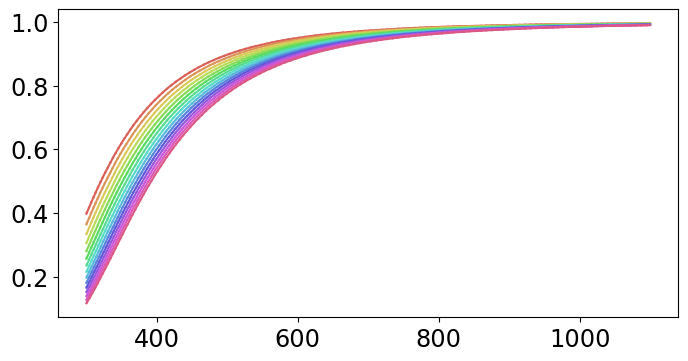

In [22]:
for idx,am in enumerate(airmasses):
    transm_training = emul.GetRayleighTransparencyArray(WL,am)
    transm_test = emul.data_rayleigh_test[:,idx]
    plt.plot(WL,transm_training,":",color=sequential_colors[idx])
    plt.plot(WL,transm_test,"-",color=sequential_colors[idx])

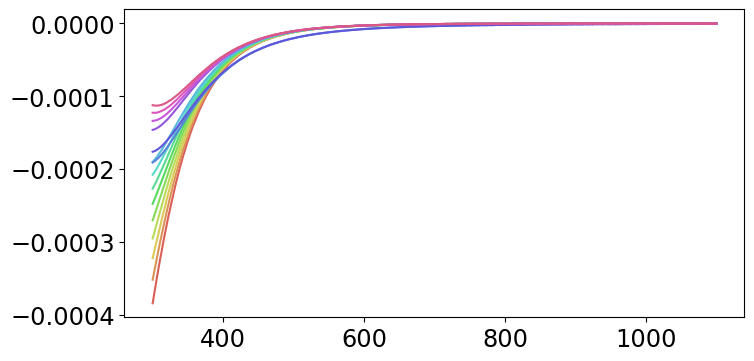

In [23]:
for idx,am in enumerate(airmasses):
    transm_training = emul.GetRayleighTransparencyArray(WL,am)
    transm_test = emul.data_rayleigh_test[:,idx]
    plt.plot(WL,transm_test-transm_training,"-",color=sequential_colors[idx])

# O2 Interpolation accuracy

## PWV Interpolation accuracy

## Ozon Interpolation accuracy